## Tutorial on Hedonic Regression

This material uses Python to demonstrate some aspects of hedonic regression, but the objective here is not to learn to program, but to understand the hedonic regression methodology.  We begin with an example in which we generate some synthetic data using a set of coefficients and a mathematical model, and learn those coefficients using a statistical method called multiple regression.

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict values of $y$ based on new values of $x$.

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

In [18]:
from IPython.display import display, Image
display(Image("regression.png", width=100))

In [20]:
# Startup steps
import pandas as pd, numpy as np, statsmodels.api as sm
import matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.font_manager as fm
import matplotlib.mlab as mlab
from scipy.stats import pearsonr, ttest_rel
%matplotlib inline

/Users/waddell/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Generate data using a model we define:

In [21]:
nsample = 100
x = np.linspace(0, 10, nsample)
beta = np.array([0, 2])
e = np.random.normal(size=nsample)
X = sm.add_constant(x)
y = np.dot(X, beta) + e

Plot the data and the model.  Note that the intercept is set to zero in this example initially.

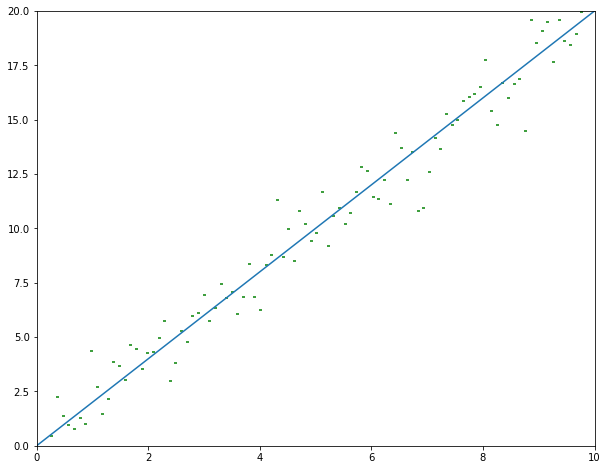

In [22]:
plt.figure(1, figsize=(10,8), )
plt.plot([0, 10], [0, 20])
plt.scatter(x, y, marker=0, s=10, c='g')
plt.axis([0, 10, 0, 20])
plt.show();

In [23]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     3027.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):           1.70e-75
Time:                        12:26:28   Log-Likelihood:                -145.37
No. Observations:                 100   AIC:                             294.7
Df Residuals:                      98   BIC:                             299.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0404      0.208      0.194      0.8

In [24]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 0.04035354  1.97359169]
R2:  0.968644727852


In [26]:
results.params

array([ 0.04035354,  1.97359169])

In [25]:
results.conf_int()

array([[-0.37164397,  0.45235105],
       [ 1.90241115,  2.04477223]])

In [21]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 2, .5])
e = np.random.normal(size=nsample)

In [22]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [23]:
X[:10]

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.1010101 ,  0.01020304],
       [ 1.        ,  0.2020202 ,  0.04081216],
       [ 1.        ,  0.3030303 ,  0.09182736],
       [ 1.        ,  0.4040404 ,  0.16324865],
       [ 1.        ,  0.50505051,  0.25507601],
       [ 1.        ,  0.60606061,  0.36730946],
       [ 1.        ,  0.70707071,  0.49994898],
       [ 1.        ,  0.80808081,  0.65299459],
       [ 1.        ,  0.90909091,  0.82644628]])

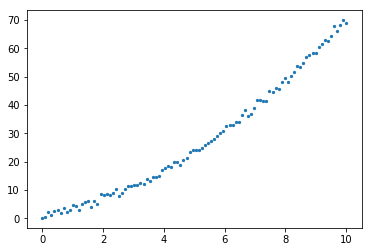

In [24]:
plt.scatter(x,y, s=5)

In [15]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.650e+04
Date:                Wed, 15 Nov 2017   Prob (F-statistic):          1.39e-123
Time:                        18:13:00   Log-Likelihood:                -153.79
No. Observations:                 100   AIC:                             313.6
Df Residuals:                      97   BIC:                             321.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1250      0.336      3.345      0.0

In [25]:
sf = pd.read_csv('data/redfin_2017-03-05-17-45-34-san-francisco-county-1-month.csv')
sf.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
       'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [26]:
sf1 = sf.rename(index=str, columns={'SALE TYPE': 'saletype',
    'SOLD DATE': 'solddate', 'PROPERTY TYPE': 'proptype', 'ADDRESS': 'address',
    'CITY': 'city', 'STATE': 'state', 'ZIP': 'zip', 'PRICE': 'price', 'BEDS': 'beds',
    'BATHS': 'baths', 'LOCATION': 'location', 'SQUARE FEET': 'sqft', 'LOT SIZE': 'lotsize',
    'YEAR BUILT': 'yrbuilt', 'DAYS ON MARKET': 'daysonmkt', '$/SQUARE FEET': 'pricesqft',
    'LATITUDE': 'latitude', 'LONGITUDE': 'longitude', 'HOA/MONTH': 'hoamonth',
    'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'url',
    'STATUS': 'status', 'NEXT OPEN HOUSE START TIME': 'nextopenstart', 'NEXT OPEN HOUSE END TIME': 'nextopenend',
    'SOURCE': 'source', 'MLS#': 'mls', 'FAVORITE': 'favorite', 'INTERESTED': 'interested'
    })

sf1.head()

,saletype,solddate,proptype,address,city,state,zip,price,beds,baths,...,status,nextopenstart,nextopenend,url,source,mls,favorite,interested,latitude,longitude
0,PAST SALE,February-7-2017,Single Family Residential,521 Cayuga Ave,San Francisco,CA,94112.0,1200000.0,2.0,1.25,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/521-Cay...,San Francisco MLS,453167,N,Y,37.728860,-122.435308
1,PAST SALE,February-10-2017,Condo/Co-op,95 Red Rock Way Unit 105M,San Francisco,CA,94131.0,590000.0,0.0,1.00,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/95-Red-...,San Francisco MLS,452726,N,Y,37.746324,-122.441517
2,PAST SALE,February-10-2017,Single Family Residential,3157 Baker St,San Francisco,CA,94123.0,3260000.0,5.0,3.50,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/3157-Ba...,San Francisco MLS,451943,N,Y,37.800218,-122.446455
3,PAST SALE,February-17-2017,Single Family Residential,2594 San Jose Ave,San Francisco,CA,94112.0,920000.0,3.0,2.00,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/2594-Sa...,MetroList,16067859,N,Y,37.716435,-122.450444
4,PAST SALE,February-27-2017,Single Family Residential,130 Brazil Ave,SAN FRANCISCO,CA,94112.0,790000.0,2.0,1.00,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Francisco/130-Bra...,MLSListings,ML81635907,N,Y,37.723920,-122.433735


In [27]:
sf1.describe()

,zip,price,beds,baths,sqft,lotsize,yrbuilt,daysonmkt,pricesqft,hoamonth,nextopenstart,nextopenend,latitude,longitude
count,308.000000,3.080000e+02,301.000000,293.000000,266.000000,139.000000,288.000000,306.00000,264.000000,159.000000,0.0,0.0,309.000000,309.000000
mean,93888.253247,1.521055e+06,2.647841,1.880546,1662.593985,3194.935252,1952.006944,14.30719,949.905303,543.874214,NaN,NaN,37.760820,-122.431289
std,2820.378426,1.063400e+06,1.862499,0.896519,1169.031917,4656.050424,39.950230,8.87308,279.135062,436.562243,NaN,NaN,0.025052,0.027834
min,59059.000000,3.500000e+03,0.000000,1.000000,300.000000,611.000000,1885.000000,2.00000,339.000000,4.000000,NaN,NaN,37.709249,-122.510730
25%,94109.000000,8.787500e+05,2.000000,1.000000,978.750000,2319.500000,1916.750000,6.00000,773.750000,342.500000,NaN,NaN,37.739065,-122.443876
50%,94114.000000,1.271000e+06,2.000000,2.000000,1360.000000,2513.000000,1941.000000,12.00000,963.500000,473.000000,NaN,NaN,37.762549,-122.428527
75%,94122.000000,1.813750e+06,3.000000,2.000000,1904.750000,3090.000000,1996.000000,23.00000,1106.000000,683.000000,NaN,NaN,37.781520,-122.412238
max,94158.000000,1.025000e+07,18.000000,5.500000,9504.000000,56024.000000,2017.000000,30.00000,2053.000000,4413.000000,NaN,NaN,37.805816,-122.371007


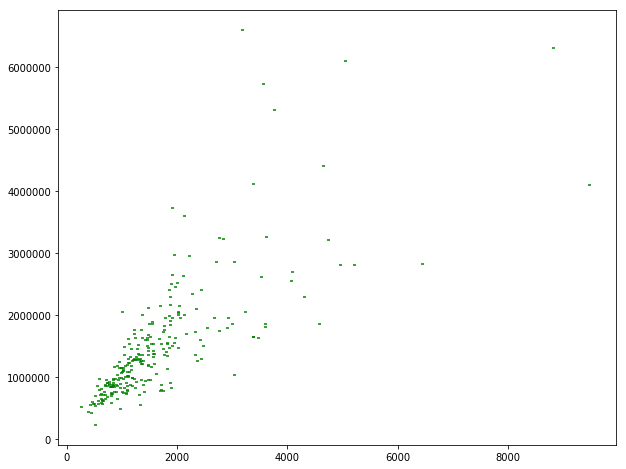

In [28]:
plt.figure(1, figsize=(10,8), )
plt.scatter(sf1['sqft'], sf1['price'], marker=0, s=10, c='g')
#plt.axis([12, 16, 12, 16])
plt.show();

In [20]:
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
y, X = dmatrices('np.log(price) ~ np.log(sqft) + C(baths)', 
                 data=sf1, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     70.43
Date:                Wed, 15 Nov 2017   Prob (F-statistic):           3.65e-66
Time:                        18:13:16   Log-Likelihood:                -14.895
No. Observations:                 255   AIC:                             51.79
Df Residuals:                     244   BIC:                             90.74
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.1469      0.351  

/Users/Paul/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/Paul/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/Paul/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Paul/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Paul/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


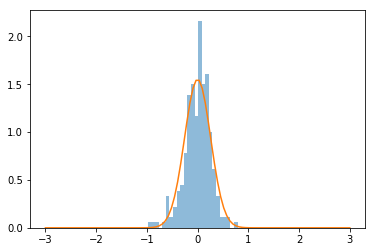

In [21]:
plt.hist(residuals, bins=25, normed=True, alpha=.5)
mu = residuals.mean()
variance = residuals.var()
sigma = residuals.std()
x = np.linspace(-3, 3, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma));

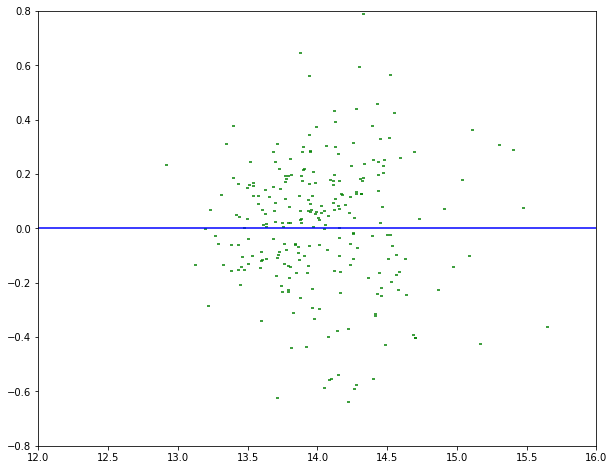

In [22]:
plt.figure(1, figsize=(10,8), )
plt.plot([12, 16], [0, 0], c='b')
plt.scatter(predicted, residuals, marker=0, s=10, c='g');
plt.axis([12, 16, -0.8, 0.8])
plt.show();

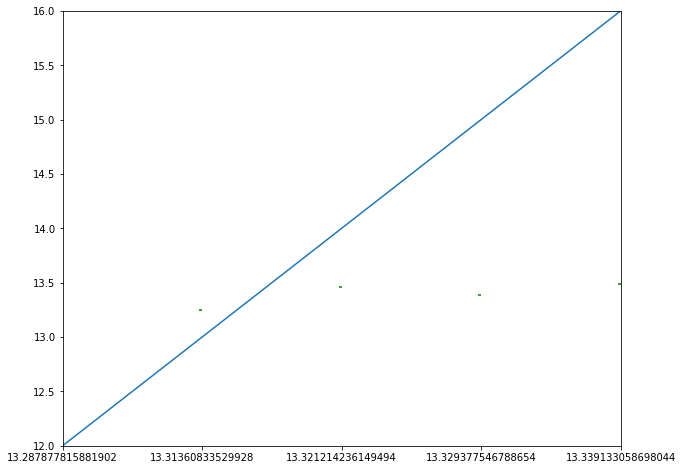

In [24]:
plt.figure(1, figsize=(10,8), )
plt.plot([12, 16], [12, 16])
plt.scatter(observed, predicted, marker=0, s=10, c='g')
plt.axis([12, 16, 12, 16])
plt.show();

In [25]:
vars = pd.read_csv('data/ba_block_variables.csv', dtype={'block_id':object})

In [26]:
vars.shape

(109228, 1015)

In [27]:
smallvars = vars[['block_id','block_groups_sum_persons','block_groups_sum_acres','block_groups_total_jobs',
                 'block_groups_median_children', 'block_groups_median_persons' , 'block_groups_median_income',
                 'block_groups_prop_tenure_2', 'nodes_low_income_hh_1500m', 'nodes_high_income_hh_1500m',
                 'nodes_jobs_5000m', 'nodes_jobs_30km', 'nodes_population_400m', 'nodes_population_800m',
                 'nodes_jobs_800m', 'prop_race_of_head_1', 'prop_race_of_head_2', 'pumas_density_households',
                 'nodes_jobs_3000m_agg1', 'nodes_jobs_3000m_agg2', 'pumas_density_jobs', 'nodes_jobs_40km',
                 'nodes_jobs_3000m_agg3', 'nodes_jobs_3000m_agg4', 'nodes_jobs_3000m_agg5',
                 'block_groups_prop_persons_1', 'block_groups_prop_persons_2', 'block_groups_median_age_of_head',
                 'puma10_id_is_0607501', 'puma10_id_is_0607502', 'puma10_id_is_0607503', 'puma10_id_is_0607504']]
sv = smallvars.rename(index=str, columns={'block_groups_sum_persons': 'bgpop',
                                     'block_groups_sum_acres': 'bgacres',
                                    'block_groups_total_jobs': 'bgjobs',
                                    'block_groups_median_children': 'bgmedkids',
                                    'block_groups_median_persons': 'bgmedhhs',
                                    'block_groups_median_income': 'bgmedinc',
                                    'block_groups_prop_tenure_2': 'proprent',
                                    'nodes_low_income_hh_1500m': 'lowinc1500m',
                                    'nodes_high_income_hh_1500m': 'highinc1500m',
                                    'nodes_jobs_5000m': 'lnjobs5000m',
                                    'nodes_jobs_30km': 'lnjobs30km',
                                    'nodes_jobs_40km': 'lnjobs40km',
                                    'nodes_population_400m': 'lnpop400m',
                                    'nodes_population_800m': 'lnpop800m',
                                    'nodes_jobs_800m': 'lnjobs800m',
                                    'prop_race_of_head_1': 'propwhite',
                                    'prop_race_of_head_2': 'propblack',
                                    'pumas_density_households': 'pumahhden',
                                    'pumas_density_jobs': 'pumajobden',
                                    'nodes_jobs_3000m_agg1': 'lnbasic3000m',
                                    'nodes_jobs_3000m_agg2': 'lntcpuw3000m',
                                    'nodes_jobs_3000m_agg3': 'lnret3000m',
                                    'nodes_jobs_3000m_agg4': 'lnfire3000m',
                                    'nodes_jobs_3000m_agg5': 'lnserv3000m',
                                    'block_groups_prop_persons_1': 'prop1per',
                                    'block_groups_prop_persons_2': 'prop2per',
                                    'block_groups_median_age_of_head': 'bgmedagehd',
                                    'puma10_id_is_0607501': 'puma1',
                                    'puma10_id_is_0607502': 'puma2',
                                    'puma10_id_is_0607503': 'puma3',
                                    'puma10_id_is_0607504': 'puma4'
                                         })
sv.head()

,block_id,bgpop,bgacres,bgjobs,bgmedkids,bgmedhhs,bgmedinc,proprent,lowinc1500m,highinc1500m,...,lnret3000m,lnfire3000m,lnserv3000m,prop1per,prop2per,bgmedagehd,puma1,puma2,puma3,puma4
0,060014271001000,888.0,90.106156,465.0,0.0,2.0,80000.0,0.558603,5.991451,6.114498,...,7.457814,5.329694,8.082779,0.34414,0.381546,57.0,0,0,0,0
1,060014271001001,888.0,90.106156,465.0,0.0,2.0,80000.0,0.558603,5.991451,6.114498,...,7.457814,5.329694,8.082779,0.34414,0.381546,57.0,0,0,0,0
2,060014271001002,888.0,90.106156,465.0,0.0,2.0,80000.0,0.558603,5.991451,6.114498,...,7.457814,5.329694,8.082779,0.34414,0.381546,57.0,0,0,0,0
3,060014271001003,888.0,90.106156,465.0,0.0,2.0,80000.0,0.558603,6.231131,6.339032,...,7.558539,5.431654,8.188618,0.34414,0.381546,57.0,0,0,0,0
4,060014271001004,888.0,90.106156,465.0,0.0,2.0,80000.0,0.558603,6.107350,5.763724,...,7.690577,5.521359,8.287781,0.34414,0.381546,57.0,0,0,0,0


Recoded detailed race code
 1 .White alone
 2 .Black or African American alone
 3 .American Indian alone
 4 .Alaska Native alone
 5 .American Indian and Alaska Native tribes specified; or American
 .Indian or Alaska native, not specified and no other races
 6 .Asian alone
 7 .Native Hawaiian and Other Pacific Islander alone
 8 .Some other race alone
 9 .Two or more major race groups 

In [29]:
with open('pg_engine.txt') as f:
    pg_engine = f.readlines()
from sqlalchemy import create_engine
engine = create_engine(pg_engine[0])

In [30]:
%%time
import pandas as pd
df = pd.read_sql_query('select * from "rental_listings"',con=engine)

CPU times: user 49.8 s, sys: 11.5 s, total: 1min 1s
Wall time: 2min 7s


In [31]:
print(df.dtypes)
df.describe()

pid              object
date             object
region           object
neighborhood     object
rent            float64
bedrooms        float64
sqft            float64
rent_sqft       float64
longitude       float64
latitude        float64
county           object
fips_block       object
state            object
bathrooms       float64
dtype: object


,rent,bedrooms,sqft,rent_sqft,longitude,latitude,bathrooms
count,1.215242e+07,1.215242e+07,1.215242e+07,1.215242e+07,1.215242e+07,1.215242e+07,1.037351e+07
mean,4.493626e+04,1.803428e+00,1.061739e+03,5.942926e+01,-9.616490e+01,3.693181e+01,1.540318e+06
std,9.081297e+06,9.543504e-01,9.648805e+03,1.454028e+04,1.685027e+01,5.198811e+00,3.515004e+09
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000001e-06,-1.793005e+02,-8.539851e+01,0.000000e+00
25%,8.710000e+02,1.000000e+00,7.360000e+02,9.332310e-01,-1.150669e+02,3.343878e+01,1.000000e+00
50%,1.210000e+03,2.000000e+00,9.400000e+02,1.267183e+00,-9.420281e+01,3.719705e+01,1.000000e+00
75%,1.730000e+03,2.000000e+00,1.170000e+03,1.875809e+00,-8.128140e+01,4.011384e+01,2.000000e+00
max,2.147484e+09,1.270000e+02,8.388607e+06,1.651910e+07,1.000000e+03,1.653830e+02,8.494864e+12


In [32]:
# convert the date column to yyyy-mm-dd date format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [33]:
# load the 2014 census data set of MSAs
census = pd.read_csv('data/census_pop_income.csv', encoding='ISO-8859-1')
census['median_income'] = census['2014_median_income'].str.replace(',','').astype(int)
census['population'] = census['2014_pop_est'].str.replace(',','').astype(int)
census = census.drop(labels='notes', axis=1, inplace=False)
census = census.set_index('region')
census.head()

,2014_median_income,2014_pop_est,census_name,median_income,population
region,,,,,
newyork,"67,066","20,092,883","New York-Newark-Jersey City, NY-NJ-PA MSA",67066,20092883
losangeles,"60,514","13,262,220","Los Angeles-Long Beach-Anaheim, CA MSA",60514,13262220
chicago,"61,598","9,554,598","Chicago-Naperville-Elgin, IL-IN-WI MSA",61598,9554598
sfbay,"80,600","8,607,423","San Jose-San Francisco-Oakland, CA CSA",80600,8607423
dallas,"59,530","6,954,330","Dallas-Fort Worth-Arlington, TX MSA",59530,6954330


In [39]:
# these are the 15 most populous metros by population, defined by census bureau 2014 estimates
most_populous_regions = census['2014_pop_est'].sort_values(ascending=False)
print(most_populous_regions.head(15))

region
honolulu          991,788
tulsa             969,224
fresno            965,974
albuquerque       904,587
chicago         9,554,598
newhaven          861,277
sfbay           8,607,423
dallas          6,954,330
houston         6,490,180
philadelphia    6,051,170
washingtondc    6,033,737
miami           5,929,819
atlanta         5,614,323
boston          4,732,161
phoenix         4,489,109
Name: 2014_pop_est, dtype: object


In [35]:
df = df.merge(census, left_on='region', right_index=True)
df.head()

,pid,date,region,neighborhood,rent,bedrooms,sqft,rent_sqft,longitude,latitude,county,fips_block,state,bathrooms,2014_median_income,2014_pop_est,census_name,median_income,population
59,5873902666,2016-11-13,cincinnati,Cincinnati,875.0,1.0,750.0,1.166667,-84.555389,39.108654,Hamilton,390610096001000,OH,NaN,"55,729","2,149,449","Cincinnati, OH-KY-IN MSA",55729,2149449
1702,5839862773,2016-11-13,cincinnati,"Cincinnati, Sycamore, Mason, Symmes",1250.0,2.0,1151.0,1.086012,-84.330700,39.269200,Hamilton,390610243014010,OH,NaN,"55,729","2,149,449","Cincinnati, OH-KY-IN MSA",55729,2149449
3264,5839904702,2016-11-13,cincinnati,"Cincinnati, Sycamore, Mason, Symmes",935.0,1.0,690.0,1.355072,-84.330700,39.269200,Hamilton,390610243014010,OH,NaN,"55,729","2,149,449","Cincinnati, OH-KY-IN MSA",55729,2149449
4376,5839895285,2016-11-13,cincinnati,"Cincinnati, Sycamore, Mason, Symmes",935.0,1.0,690.0,1.355072,-84.330700,39.269200,Hamilton,390610243014010,OH,NaN,"55,729","2,149,449","Cincinnati, OH-KY-IN MSA",55729,2149449
5020,5874127885,2016-11-13,cincinnati,"Oakley, UT",700.0,3.0,2085.0,0.335731,-111.245600,40.724300,Summit,490439642021006,UT,NaN,"55,729","2,149,449","Cincinnati, OH-KY-IN MSA",55729,2149449


In [ ]:
# Create an HDF5 file if desired, in the data directory
#df.to_hdf('data/rents.h5','rents',append=False)

In [ ]:
# Load from HDF5 if desired
#df = pd.HDFStore('data/rents.h5')
#df

In [36]:
upper_percentile = 0.998
lower_percentile = 0.002

# how many rows would be within the upper and lower percentiles?
upper = int(len(df) * upper_percentile)
lower = int(len(df) * lower_percentile)

# get the rent/sqft values at the upper and lower percentiles
rent_sqft_sorted = df['rent_sqft'].sort_values(ascending=True, inplace=False)
upper_rent_sqft = rent_sqft_sorted.iloc[upper]
lower_rent_sqft = rent_sqft_sorted.iloc[lower]

# get the rent values at the upper and lower percentiles
rent_sorted = df['rent'].sort_values(ascending=True, inplace=False)
upper_rent = rent_sorted.iloc[upper]
lower_rent = rent_sorted.iloc[lower]

# get the sqft values at the upper and lower percentiles
sqft_sorted = df['sqft'].sort_values(ascending=True, inplace=False)
upper_sqft = sqft_sorted.iloc[upper]
lower_sqft = sqft_sorted.iloc[lower]

print('valid rent_sqft range:', [lower_rent_sqft, upper_rent_sqft])
print('valid rent range:', [lower_rent, upper_rent])
print('valid sqft range:', [lower_sqft, upper_sqft])

valid rent_sqft range: [0.094654788418708197, 8.8050847457627093]
valid rent range: [100.0, 9995.0]
valid sqft range: [202.0, 4428.0]


In [37]:
# create a boolean vector mask to filter out any rows with rent_sqft outside of the reasonable values
rent_sqft_mask = (df['rent_sqft'] > lower_rent_sqft) & (df['rent_sqft'] < upper_rent_sqft)

# create boolean vector masks to filter out any rows with rent or sqft outside of the reasonable values
rent_mask = (df['rent'] > lower_rent) & (df['rent'] < upper_rent)
sqft_mask = (df['sqft'] > lower_sqft) & (df['sqft'] < upper_sqft)

# filter the thorough listings according to these masks
filtered_listings = pd.DataFrame(df[rent_sqft_mask & rent_mask & sqft_mask])
len(filtered_listings)

7792502

In [ ]:
filtered_listings.describe()

In [ ]:
#sfbay = filtered_listings[filtered_listings['region']=='sfbay']
sfbay = df[df['region']=='sfbay']
sfbay.describe()

In [ ]:
#sfbay['rent_sqft'].quantile(.01)

In [ ]:
#sfbay['sqft'].quantile(.01)

In [ ]:
# create a boolean vector mask to filter out any rows with rent_sqft and sqft in Bay Area under 1 percentile
#sfbay_rent_sqft_mask = (sfbay['rent_sqft'] > sfbay['rent_sqft'].quantile(.01) )

# create boolean vector masks to filter out any rows with rent or sqft outside of the reasonable values
#sfbay_sqft_mask = (sfbay['sqft'] > sfbay['sqft'].quantile(.01) )

# filter the thorough listings according to these masks
#sfbay_filtered = pd.DataFrame(sfbay[sfbay_rent_sqft_mask & sfbay_sqft_mask])
#len(sfbay_filtered)

In [ ]:
upper_percentile = 0.998
lower_percentile = 0.002

# how many rows would be within the upper and lower percentiles?
upper = int(len(sfbay) * upper_percentile)
lower = int(len(sfbay) * lower_percentile)

# get the rent/sqft values at the upper and lower percentiles
rent_sqft_sorted = sfbay['rent_sqft'].sort_values(ascending=True, inplace=False)
upper_rent_sqft = rent_sqft_sorted.iloc[upper]
lower_rent_sqft = rent_sqft_sorted.iloc[lower]

# get the rent values at the upper and lower percentiles
rent_sorted = sfbay['rent'].sort_values(ascending=True, inplace=False)
upper_rent = rent_sorted.iloc[upper]
lower_rent = rent_sorted.iloc[lower]

# get the sqft values at the upper and lower percentiles
sqft_sorted = sfbay['sqft'].sort_values(ascending=True, inplace=False)
upper_sqft = sqft_sorted.iloc[upper]
lower_sqft = sqft_sorted.iloc[lower]

print('valid rent_sqft range:', [lower_rent_sqft, upper_rent_sqft])
print('valid rent range:', [lower_rent, upper_rent])
print('valid sqft range:', [lower_sqft, upper_sqft])

In [ ]:
# create a boolean vector mask to filter out any rows with rent_sqft outside of the reasonable values
rent_sqft_mask = (sfbay['rent_sqft'] > lower_rent_sqft) & (sfbay['rent_sqft'] < upper_rent_sqft)

# create boolean vector masks to filter out any rows with rent or sqft outside of the reasonable values
rent_mask = (sfbay['rent'] > lower_rent) & (sfbay['rent'] < upper_rent)
sqft_mask = (sfbay['sqft'] > lower_sqft) & (sfbay['sqft'] < upper_sqft)

# filter the thorough listings according to these masks
sfbay_filtered = pd.DataFrame(sfbay[rent_sqft_mask & rent_mask & sqft_mask])
len(sfbay_filtered)

In [ ]:
sfbay_filtered.describe()

In [ ]:
sf = sfbay_filtered.merge(sv, left_on='fips_block', right_on='block_id')
sf['northsf'] = sf['puma1']+sf['puma2']+sf['puma3']+sf['puma4']
sf['sqft1'] = sf['sqft']*sf['sqft']<1500
sf['sqft2'] = sf['sqft']*sf['sqft']>1499
sf['pct1per'] = sf['prop1per']*100
sf['pct2per'] = sf['prop2per']*100
sf['pctrent'] = sf['proprent']*100
sf['pctblack'] = sf['propblack']*100
sf.head()

In [ ]:
sf.describe()

In [ ]:
sf['bgpopden'] = sf['bgpop']/sf['bgacres']
sf['bgjobden'] = sf['bgjobs']/sf['bgacres']
sf['highlowinc1500m'] = sf['highinc1500m']/sf['lowinc1500m']

In [ ]:
sf.dtypes

In [ ]:
# Use either filtered_listings for the national dataset or sfbay_filtered for the Bay Area subset

import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
y, X = dmatrices('np.log(rent) ~ np.log(sqft) + bedrooms + bathrooms \
                 ', 
                 data=sf, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

In [ ]:
# Use either filtered_listings for the national dataset or sfbay_filtered for the Bay Area subset

import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
y, X = dmatrices('np.log(rent) ~ np.log(sqft) + bedrooms + bathrooms  +\
                 np.log(bgmedinc) + lnjobs5000m + lnjobs40km + pctblack \
                  + pumahhden + pctrent + pct1per + pct2per + bgmedagehd  \
                 ', 
                 data=sf, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

In [ ]:
plt.hist(residuals, bins=25, normed=True, alpha=.5)
mu = residuals.mean()
variance = residuals.var()
sigma = residuals.std()
x = np.linspace(-3, 3, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma));

In [ ]:
plt.figure(1, figsize=(10,8), )
plt.plot([7, 9], [0, 0], c='b')
plt.scatter(predicted, residuals, marker=0, s=2, c='g');
plt.axis([7.25, 9, -1.5, 1.5])
plt.show();

In [ ]:
plt.figure(1, figsize=(10,8), )
plt.plot([6, 9.5], [6, 9.5])
plt.scatter(observed, predicted, marker=0, s=2, c='g')
plt.axis([6.5, 9.5, 6.5, 9.5])
plt.show();

In [ ]:
print(residuals.mean())
print(residuals.std())

In [ ]:
# If we want to use WLS we need a useful set of weights. The default produces the same results as OLS 
mod = sm.WLS(y, X, weights=1.)
res = mod.fit()
print(res.summary())

In [ ]:
# Warning, this is a very intensive process and will take a while
%%time
from pymc3 import Model, NUTS, sample
from pymc3.glm import glm

with Model() as model_glm:
    glm('np.log(rent) ~ np.log(sqft) + bedrooms + bathrooms', sfbay_filtered)
    trace = sample(5000)

In [ ]:
from pymc3 import traceplot
%matplotlib inline
traceplot(trace);

In [ ]:
from scipy import optimize
from pymc3 import find_MAP
with model_glm:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # draw 2000 posterior samples
    trace = sample(5000, start=start)

In [ ]:
traceplot(trace);

In [ ]:
import matplotlib.pyplot as plt
import theano
import pymc3 as pm

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(np.log(sfbay['sqft']), np.log(sfbay['rent']), 'o', markersize=.5, color='blue', label='sampled data')
#ax.plot(x, true_regression_line, label='true regression line', lw=2.)
#pm.glm.plot_posterior_predictive(trace, samples=100,
#                                 label='posterior predictive regression lines')
plt.legend(loc=0);